Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [3]:
from scipy.stats import norm

mean = 9.5
std = 0.4

n = 160
mean_n = 9.57

Z = (mean_n - mean) / (std / n**0.5)
P_val = 2. * (1 - norm.cdf(Z))

print "Z = {0}, P_val = {1}".format(Z, round(P_val, 4))

Z = 2.21359436212, P_val = 0.0269


Имеются данные о стоимости и размерах 53940 бриллиантов:

diamonds.txt

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). 

На обучающей выборке настройте две регрессионные модели:

-линейную регрессию с помощью LinearRegression без параметров
-случайный лес с помощью RandomForestRegressor с random_state=1.

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05?

In [27]:
from sklearn.model_selection import train_test_split as tts
import pandas as pd
import numpy as np

data = pd.read_csv("./diamonds.txt", "\t")
print data.shape
data.head()

(53940, 7)


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [15]:
X = data.drop(["price"], axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, 
                                                    random_state=1)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linreg = LinearRegression()
forest = RandomForestRegressor(random_state=1)

linreg.fit(X_train, y_train)
forest.fit(X_train, y_train)

linreg_predicts = linreg.predict(X_test)
forest_predicts = forest.predict(X_test)

<type 'numpy.ndarray'>


In [35]:
linreg_deviations = abs(y_test - linreg_predicts)
forest_deviations = abs(y_test - forest_predicts)

Populating the interactive namespace from numpy and matplotlib


((array([-3.88388616, -3.66274206, -3.54151337, ...,  3.54151337,
          3.66274206,  3.88388616]),
  array([-15105.14636008, -10824.7757726 ,  -8839.29300989, ...,
           5523.53373191,   5636.77396851,   6109.97686053])),
 (716.7534700651927, -87.4558831561498, 0.9185188119907337))

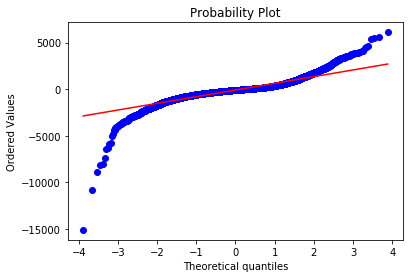

In [37]:
%pylab inline 
from statsmodels.stats.weightstats import *

stats.probplot(forest_deviations - linreg_deviations, dist = "norm", plot = pylab)

In [38]:
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(forest_deviations - linreg_deviations)

Shapiro-Wilk normality test, W-statistic: 0.844489, p-value: 0.000000


/Applications/anaconda/envs/ML_course/lib/python2.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [39]:
stats.ttest_rel(linreg_deviations, forest_deviations)

Ttest_relResult(statistic=13.017729783878696, pvalue=1.655174575138418e-38)

In [50]:
round(DescrStatsW(forest_deviations - linreg_deviations).tconfint_mean()[1], 10)

-74.287245326